In [81]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [82]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='month_no')

In [83]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [92]:
df_us_software = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')
df_us_software


,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [94]:
df_us_merged = df_US_pivot.merge(df_us_software, on='job_posted_month')

In [95]:
top5 = (
    df_us_merged.sum().sort_values(ascending=False).head().index.to_list()
)

top5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

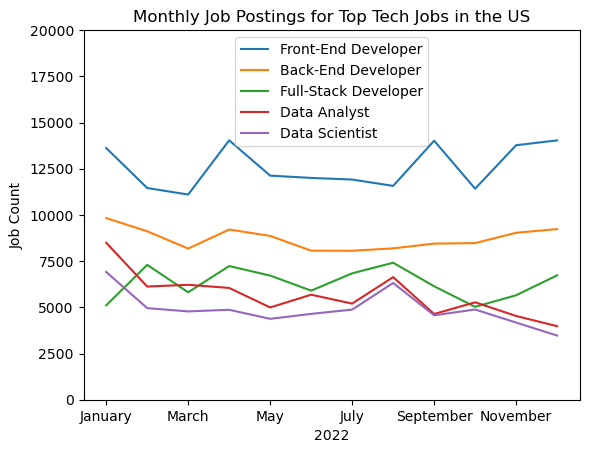

In [97]:
df_us_merged[top5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.xlabel('2022')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()